In [3]:
# 라이브러리 설정
from tensorflow import keras
from sklearn.model_selection import train_test_split



In [10]:
# 모델 불러오기 & layers 확인하기
model = keras.models.load_model('C:/Users/kwonk/Downloads/개인 프로젝트/juno1412-1/DL/best_cnn_model.h5')
model.layers

In [13]:
# 커널 & 커널 가중치 확인하기
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

# 커널 가중치 평균값 & 표준편차
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

(3, 3, 1, 32) (32,)
-0.034497086 0.25352186


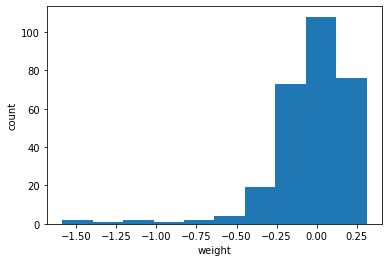

In [17]:
# 커널 가중치 시각화
import matplotlib.pyplot as plt

# hist = 1차원 그래프
# reshape (-1, 1)로 1차원으로 변경 후 그래프 시각화
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

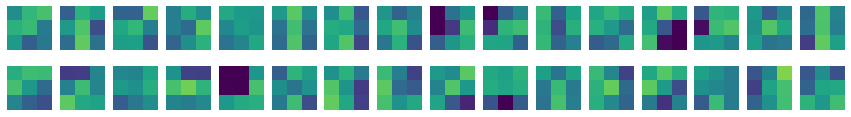

In [18]:
# 32개의커널 2x16형식으로 출력해보기
fig, axs = plt.subplots(2, 16, figsize=(15,2))

# i*16번째+j번째 순회 후, 가중치값 차례로 출력
# i = 행인덱스, j = 열 인덱스
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

(3, 3, 1, 32)
-0.008140376 0.08234751


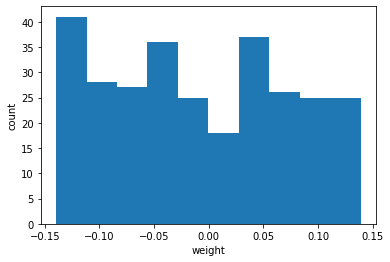

In [20]:
# 훈련되지 않은 합성곱 신경망
no_train_model = keras.Sequential()
no_train_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

no_train_conv = no_train_model.layers[0]
print(no_train_conv.weights[0].shape)

no_train_weights = no_train_conv.weights[0].numpy()
print(no_train_weights.mean(), no_train_weights.std())

plt.hist(no_train_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()





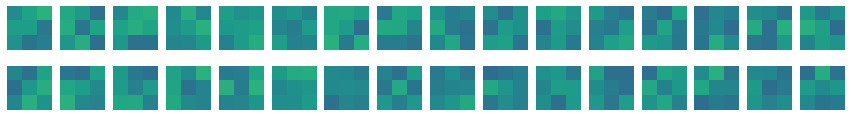

In [21]:
# 훈련하지 않은 데이터 커널 출력하기
# 32개의커널 2x16형식으로 출력해보기
fig, axs = plt.subplots(2, 16, figsize=(15,2))

# i*16번째+j번째 순회 후, 가중치값 차례로 출력
# i = 행인덱스, j = 열 인덱스
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_train_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [ ]:
# 함수형 API
print(model.input)
conv_acti = keras.Model(model.input, model.layers[0].output)

In [ ]:
# 특성맵 시각화
